In [16]:
import pandas as pd, datetime, glob
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['agg.path.chunksize']=40000 



In [17]:
def custom_date_parser(x, y, z, a, b): return datetime.datetime.strptime(
    f"{x} {y} {z} {a} {b}", "%Y %m %d %H %M")


In [18]:

display_file = pd.read_csv("../Testing Notebook/Solar Data/2018/2c56c0432ecc5f6fde2c429a58d35601/2824758_18.52_-67.29_2018.csv",
                           header=[2], parse_dates={'Date': [0, 1, 2, 3, 4]}, date_parser=custom_date_parser)
display_file2 = pd.read_csv(
    "../Testing Notebook/Solar Data/2018/2c56c0432ecc5f6fde2c429a58d35601/2824758_18.52_-67.29_2018.csv", nrows=1)


display_file3 = pd.read_csv("../Testing Notebook/Solar Data/2019/e0ef61efe7cf6042bae90234975fed0b/2829149_17.90_-65.55_2019.csv",
                            header=[2], parse_dates={'Date': [0, 1, 2, 3, 4]}, date_parser=custom_date_parser)
display_file4 = pd.read_csv(
    "../Testing Notebook/Solar Data/2019/e0ef61efe7cf6042bae90234975fed0b/2829149_17.90_-65.55_2019.csv", nrows=1)


display_file["Latitude"] = display_file2.Latitude[0]
display_file["Longitude"] = display_file2.Longitude[0]


display_file3["Latitude"] = display_file4.Latitude[0]
display_file3["Longitude"] = display_file4.Longitude[0]

test_df = pd.concat([display_file3, display_file4])
test_df
test_group_df = test_df.groupby(
    [pd.Grouper(key="Date", freq='1D'), "Latitude", "Longitude"]).mean()
test_group_df
# desired_output = pd.read_csv("../Solar Data/INSOLRICO.2021302.csv", delim_whitespace=True,names=["value","latitude","longitude"])


,,,GHI,DNI,Temperature,Relative Humidity,Location ID,Time Zone,Elevation,Local Time Zone,Cloud Type -15,Fill Flag 0,Surface Albedo Units
Date,Latitude,Longitude,,,,,,,,,,,
2019-01-01,17.9,-65.55,213.468750,310.114583,26.545833,72.567396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,17.9,-65.55,137.145833,133.166667,26.314583,76.980417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,17.9,-65.55,212.958333,294.072917,26.510417,75.581771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,17.9,-65.55,208.989583,291.750000,26.613542,77.970833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,17.9,-65.55,225.625000,343.697917,26.759375,73.613750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,17.9,-65.55,127.593750,67.208333,27.034375,83.931250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,17.9,-65.55,203.520833,265.177083,27.403125,80.579063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,17.9,-65.55,190.229167,252.864583,27.506250,79.656562,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
year = "2019"
for DataFile in glob.glob(
    f"../Testing Notebook/Solar Data/**/*{year}.csv", recursive=True):
    Lat_Lon_DF1 = pd.read_csv(DataFile, nrows=1)
    CSV_DF = pd.read_csv(DataFile, header=[2], parse_dates={
        'Date': [0, 1, 2, 3, 4]}, date_parser=custom_date_parser)
    a = CSV_DF.groupby(pd.Grouper(key='Date', freq='15min')).mean()
    b = a.filter(like="2019-01-01", axis=0)
    # filtering = a[['Date']] == "2019-01-01"
    # a.where(filtering, inplace=True)
    # b = a.apply(a[a['Date'].astype(str).str.contains("2019-01-01")])
    # a = CSV_DF.groupby(by=[lambda dt: dt.strftime('%Y-%m-%d %H:%M:%S'), 'GHI']).mean()
    # a = CSV_DF.date_range("2019-01-01", periods=95, freq="15min")
    
print(b)


D:\Users\viaje\anaconda3\envs\solarData\lib\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)
D:\Users\viaje\anaconda3\envs\solarData\lib\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)
D:\Users\viaje\anaconda3\envs\solarData\lib\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)
D:\Users\viaje\anaconda3\envs\solarData\lib\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)
D:\Users\viaje\anaconda3\envs\solarData\lib\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)
D:\Us

                     GHI  DNI  Wind Speed  Temperature  Relative Humidity
Date                                                                     
2019-01-01 00:00:00  0.0  0.0         5.2         25.9              78.23
2019-01-01 00:15:00  0.0  0.0         5.3         25.9              78.23
2019-01-01 00:30:00  0.0  0.0         5.3         25.9              78.23
2019-01-01 00:45:00  0.0  0.0         5.3         25.9              78.07
2019-01-01 01:00:00  0.0  0.0         5.3         25.9              78.07
...                  ...  ...         ...          ...                ...
2019-01-01 22:45:00  0.0  0.0         4.9         26.0              78.90
2019-01-01 23:00:00  0.0  0.0         4.9         26.0              78.90
2019-01-01 23:15:00  0.0  0.0         4.9         25.9              79.36
2019-01-01 23:30:00  0.0  0.0         4.9         25.9              79.36
2019-01-01 23:45:00  0.0  0.0         4.9         25.9              80.35

[96 rows x 5 columns]


In [14]:
jan_1_df = BigDF[BigDF['Date'].astype(str).str.contains("2019-01-01")]
date_col = jan_1_df.iloc[:, :1]
# date_col = BigDF[["Date"]]
print(date_col)

                  Date
0  2019-01-01 00:00:00
1  2019-01-01 00:15:00
2  2019-01-01 00:30:00
3  2019-01-01 00:45:00
4  2019-01-01 01:00:00
..                 ...
91 2019-01-01 22:45:00
92 2019-01-01 23:00:00
93 2019-01-01 23:15:00
94 2019-01-01 23:30:00
95 2019-01-01 23:45:00

[70176 rows x 1 columns]


In [15]:
ghi_col = jan_1_df.iloc[:,1:2]
# ghi_col = date_col[['GHI']]
print(ghi_col)


    GHI
0     0
1     0
2     0
3     0
4     0
..  ...
91    0
92    0
93    0
94    0
95    0

[70176 rows x 1 columns]


ValueError: Boolean array expected for the condition, not object

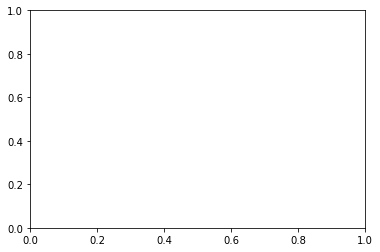

In [16]:
BigDF.plot.scatter(x=date_col, y=ghi_col, use_index=True)



In [ ]:
BigDF.groupby('Date', 'Longitude', 'Latitude')


In [17]:
test = BigDF.groupby(
    [pd.Grouper(key="Date", freq='15min'), "Latitude", "Longitude"]).plot.scatter(x='Date', y='GHI')


MemoryError: 